In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing                      

In [2]:
# Importing the data set
company = pd.read_csv("G:/data sceince/Assignments/DecisionTrees/Company_Data.csv")

In [3]:
# Displaying the head
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# Checking the number of rows and columns
company.shape

(400, 11)

In [5]:
# Checking for null values
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
# Checking for data types of each column
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
# As the three columns ShelveLoc, Urban, US are of object type need to convert that in proper categorical columns
company['ShelveLoc'] = company['ShelveLoc'].astype('category')
company['Urban'] = company['Urban'].astype('category')
company['US'] = company['US'].astype('category')

In [8]:
company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

Columns are converted to proper desired data types

In [9]:
# As we have to convert the sales column into categorical column so need to calculate the mean first and then using lambda function categorize that column into 0's and 1's according to the mean
sales_mean = company.Sales.mean()
sales_mean

7.496325

Inference : As the mean is 7.49, we will round it off to 8 and categorize the column

In [10]:
company['High'] = company.Sales.map(lambda x: 1 if x > 8 else 0)

In [11]:
company.High

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [12]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [13]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [14]:
# Encoding the categorical columns by using label encoder

In [15]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])

In [16]:
company['Urban'] = label_encoder.fit_transform(company['Urban'])

In [17]:
company['US'] = label_encoder.fit_transform(company['US'])

In [18]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [19]:
# Splitting the data into x and y as input and output

X = company.iloc[:,1:11]
Y = company['High']

In [20]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [21]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [22]:
# Displaying the unique values, there are only two unique values 0 and 1, for high sales(sales>8) it is 1 and for low sales(sales<8) it is 0

company['High'].unique()

array([1, 0], dtype=int64)

In [23]:
company.High.value_counts()

0    236
1    164
Name: High, dtype: int64

Inference: 236 values are there where the sales are less than 8 and 164 values are there where sales are greater than 8

In [24]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

#### Building a model using C5.O Decision tree classifier

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = 'balanced')

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 92.5\nentropy = 1.0\nsamples = 320\nvalue = [160.0, 160.0]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\nentropy = 0.562\nsamples = 48\nvalue = [7.461, 49.134]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 57.0\nentropy = 0.943\nsamples = 13\nvalue = [4.974, 8.819]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [4.145, 0.0]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.423\nsamples = 8\nvalue = [0.829, 8.819]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 56.5\nentropy = 0.32\nsamples = 35\nvalue = [2.487, 40.315]'),
 Text(104.625, 27.180000000000007, 'entropy = -0.0\nsamples = 21\nvalue = [0.0, 26.457]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.615\nsamples = 14\nvalue = [2.487, 13.858]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.5\nentropy = 0.982\nsamples = 272\nvalue = [152.539, 110.866]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 102.5\nentropy = 0.36\nsamples = 65\nvalue = [51.399, 3.78]'),
 Text(1

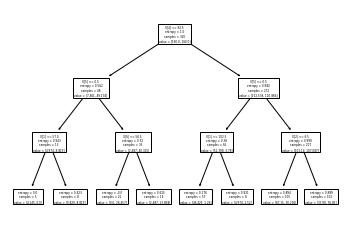

In [27]:
tree.plot_tree(model)

In [28]:
# As this tree is not visible so we will display it with some another technique

In [29]:
# we will extract the feature names, class names and we will define the figure size so that our tree will be visible in a better way

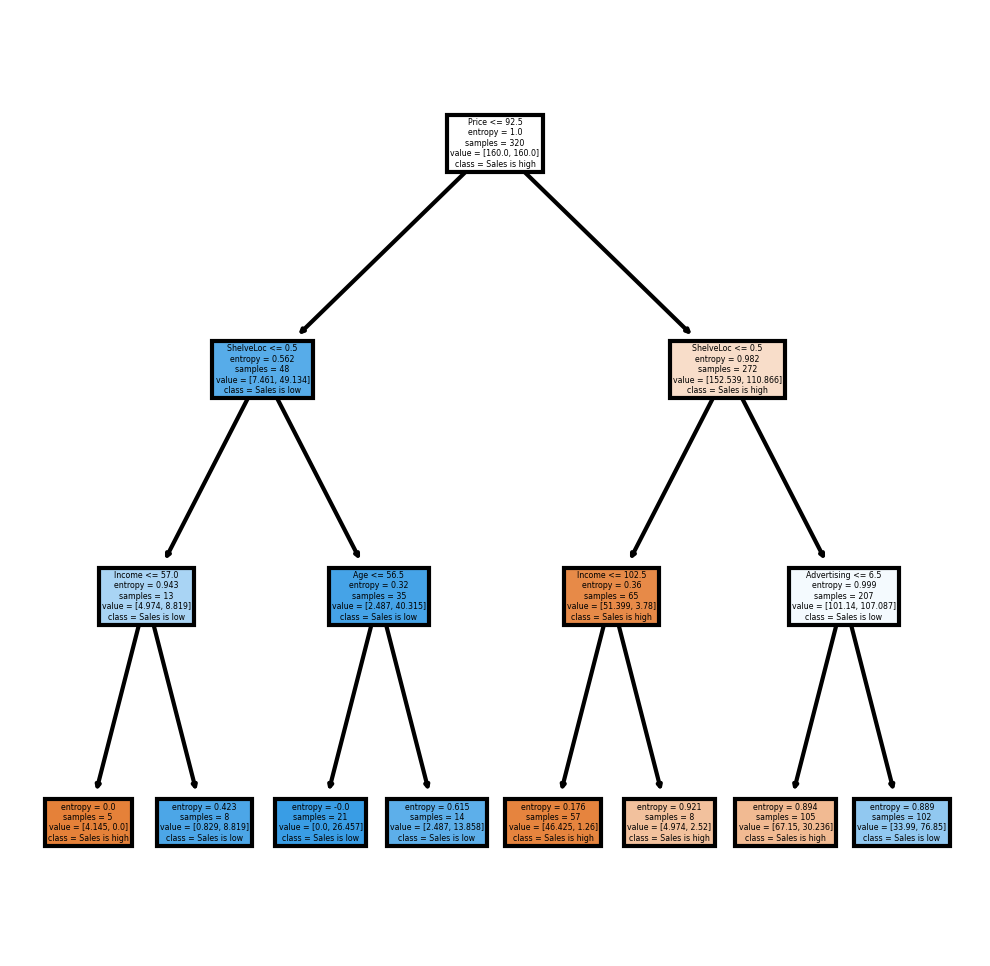

In [30]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [31]:
# Predicting the builded model on our x-test data

preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64

In [32]:
preds

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [33]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0,0,1
High,,
0,33,10
1,12,25


In [34]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

0.725

In [35]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.68      0.71      0.69        35

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80



#### Building a decision tree using CART method (Classifier model)

In [38]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced')

In [39]:
model_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [160.0, 160.0]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\ngini = 0.229\nsamples = 48\nvalue = [7.461, 49.134]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 57.0\ngini = 0.461\nsamples = 13\nvalue = [4.974, 8.819]'),
 Text(20.925, 27.180000000000007, 'gini = 0.0\nsamples = 5\nvalue = [4.145, 0.0]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.157\nsamples = 8\nvalue = [0.829, 8.819]'),
 Text(125.55000000000001, 81.53999999999999, 'X[6] <= 56.5\ngini = 0.109\nsamples = 35\nvalue = [2.487, 40.315]'),
 Text(104.625, 27.180000000000007, 'gini = -0.0\nsamples = 21\nvalue = [0.0, 26.457]'),
 Text(146.475, 27.180000000000007, 'gini = 0.258\nsamples = 14\nvalue = [2.487, 13.858]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.5\ngini = 0.487\nsamples = 272\nvalue = [152.539, 110.866]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 102.5\ngini = 0.128\nsamples = 65\nvalue = [51.399, 3.78]'),
 Text(188.32500000000002, 27.180000

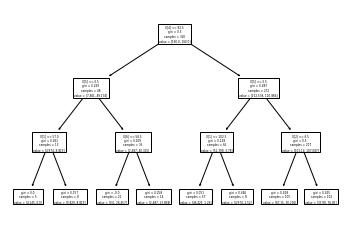

In [41]:
preds = model_1.predict(x_test)

In [42]:
preds

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [43]:
pd.Series(preds).value_counts()

0    45
1    35
dtype: int64

In [44]:
np.mean(preds == y_test)

0.725

Inference : Accuracy of the model is 72.5 percent